# Spot detection #

## Load image ##

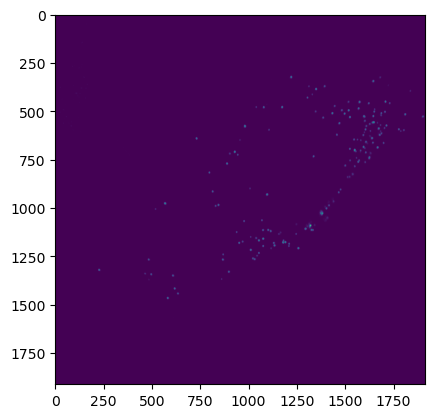

In [5]:
from scyjava import config          # for AICSImage
from aicsimageio import AICSImage   # for reading the image
import matplotlib.pyplot as plt     # for plotting/display 

mydata=AICSImage("C:/Users/Dina Ratsimandresy/Documents/MRC-Office/Dataset/PythonCourse precious images/Airy_4color_40nm_67e5micron_diversoformato-confocal.tif")
myimg = mydata.data[0,2,0,:,:]  # select all channels at t = 0 and z = 0

plt.imshow(myimg)
plt.show()

## Blob detection ##

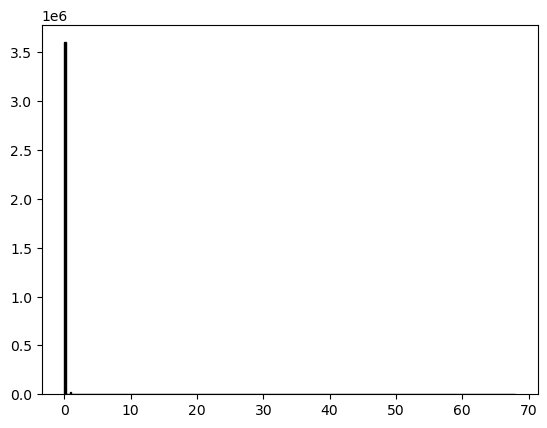

In [29]:
plt.hist(myimg.ravel(), bins=256, range=(myimg.min(), myimg.max()), fc='k', ec='k')
plt.show()

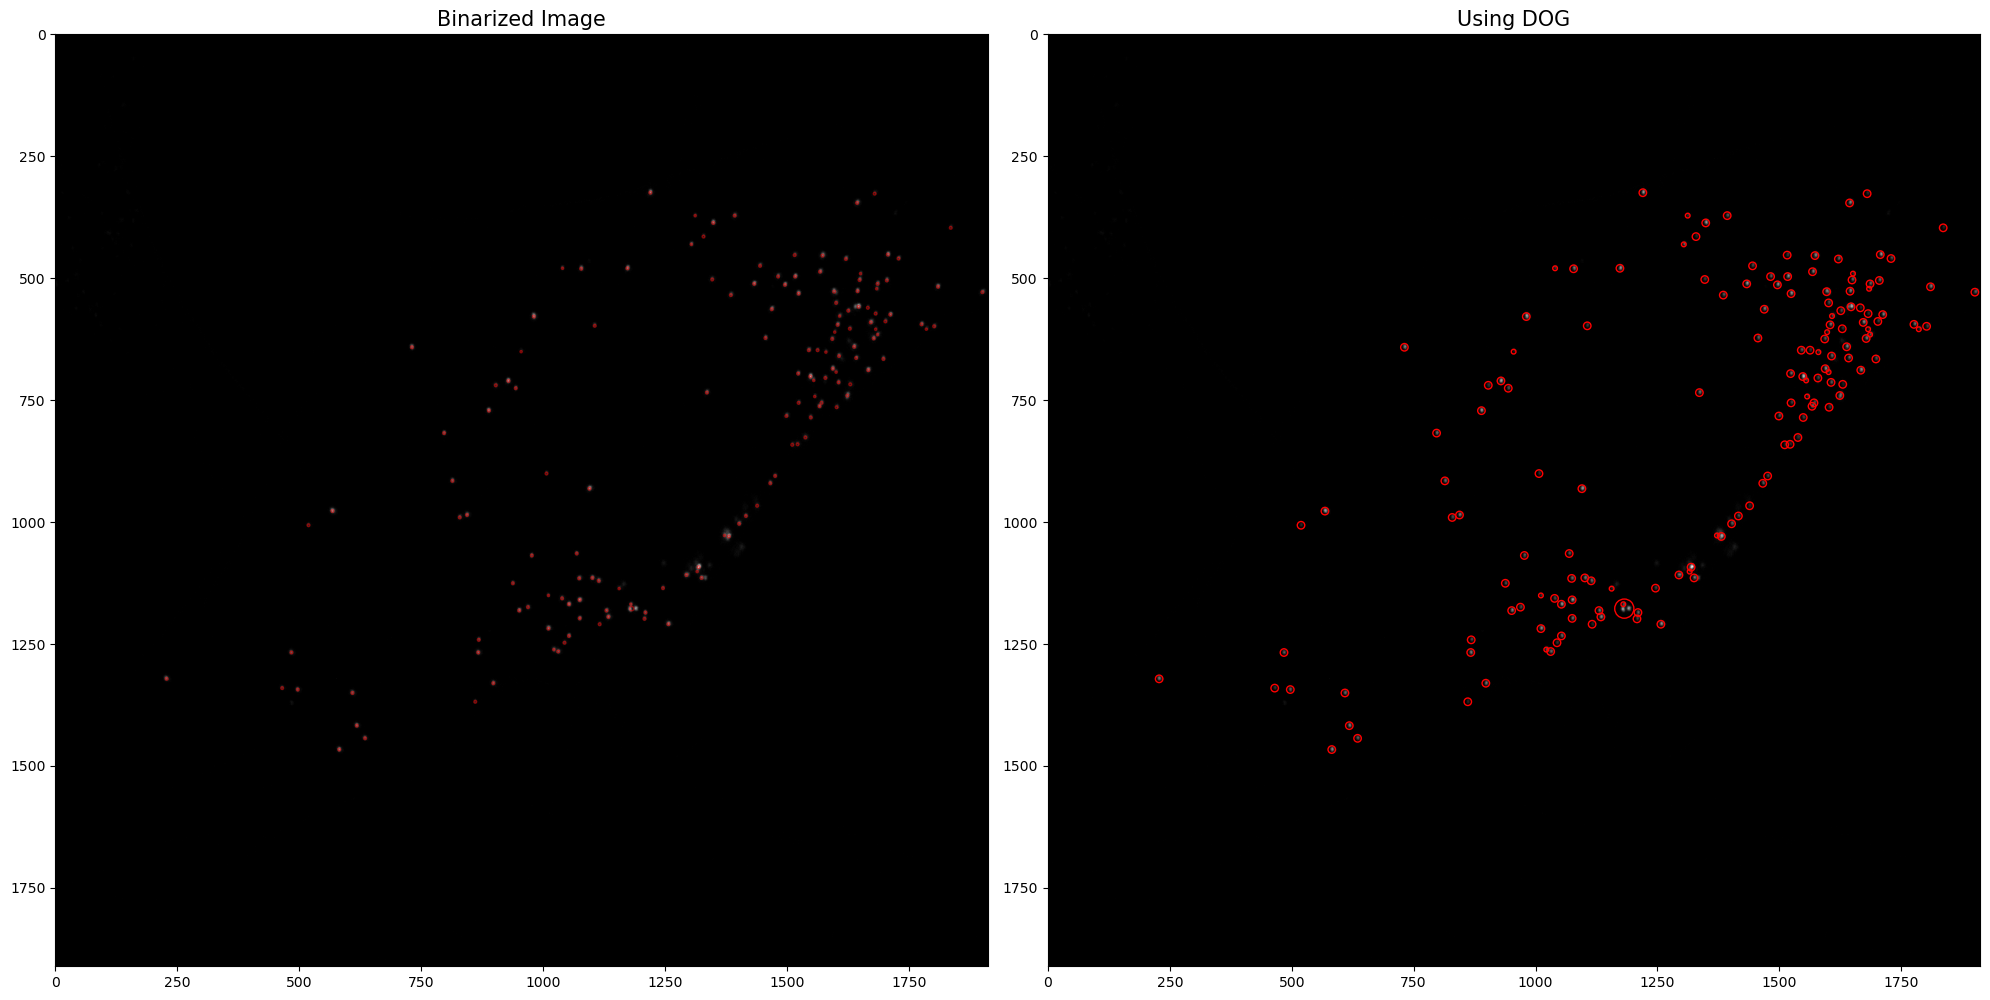

In [69]:
from skimage.feature import blob_dog
import numpy as np

fig, ax = plt.subplots(1,2,figsize=(20,15))
ax[0].set_title('Binarized Image',fontsize=15)
ax[0].imshow(myimg,cmap='gray')

# Difference of Gaussian (DOG)
y_x_sigmas_output = blob_dog(myimg, max_sigma=10, threshold=0.01)

ax[1].imshow(myimg, cmap='gray')
for coord in y_x_sigmas_output:
    y, x, sigma = coord # outputs of the dog
    ax[1].add_patch(plt.Circle((x, y), sigma*3, color='r',  
                            fill=False))
ax[1].set_title('Using DOG',fontsize=15)

ax[0].scatter(y_x_sigmas_output[:,1],y_x_sigmas_output[:,0],np.sqrt(2)*y_x_sigmas_output[:,2],alpha=0.5,facecolors='none',edgecolor='red')

plt.tight_layout()
plt.show()

In [47]:
dogs.shape

(151, 3)